# Getting started with Pandas TimeSeries

This notebook is intended to introduce you to the basic Pandas DateTime    
The following five points will be covered:

1. [Parsing DateTime](#task1)
2. [Aggregating columns](#task2)
3. [Extracting DateTime properties](#task3)
4. [Fitering and Selecting specific durations](#task4)
5. [Changing the granularity of the Timeseries](#task5)


### Prepare environment and read data 

In [2]:
# Libraries 
import pandas as pd 
import matplotlib.pyplot as plt

# Set default properties for plotting 
plt.rcParams['figure.figsize'] = [11, 4]
plt.rcParams['figure.dpi'] = 100 

In [4]:
# Constants 
INPUT_PATH = '/kaggle/input/netflix-shows/netflix_titles.csv'
raw_df = pd.read_csv(INPUT_PATH)
raw_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


_____

## Task 1: Countthe number of shows added per day     

In the following section, we will parse the raw date format into      
pandas datetime and summarize the daily shows added to the total number 

### Parse timestamp into datetime column <a id='task1'></a>

Change the raw format to a pandas datetime format.    
Once we have changed the format as such, we will be able to    
apply more functionalities illustrated below 


In [12]:
raw_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [20]:
# Copy original data
df = raw_df.copy()

# Parse the raw `date_added` column to pandas datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Check the type of the `date_added` column
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

### Count shows added  per date <a id='task2'></a>
All the shows have been listed in the original dataframe.     
Now let's count the total number of shows added per day

In [36]:
# For each date, count the number of show added
num_shows=df.groupby('date_added')[['show_id']].count()
num_shows

,show_id
date_added,
2008-01-01,1
2008-02-04,1
2009-05-05,1
2009-11-18,1
2010-11-01,1
...,...
2021-09-21,5
2021-09-22,9
2021-09-23,2


In [25]:
# Rename column to describe the new content 
num_shows=num_shows.rename({'show_id':'num_of_show_added'},axis=1)
num_shows

,num_of_show_added
date_added,
2008-01-01,1
2008-02-04,1
2009-05-05,1
2009-11-18,1
2010-11-01,1
...,...
2021-09-21,5
2021-09-22,9
2021-09-23,2


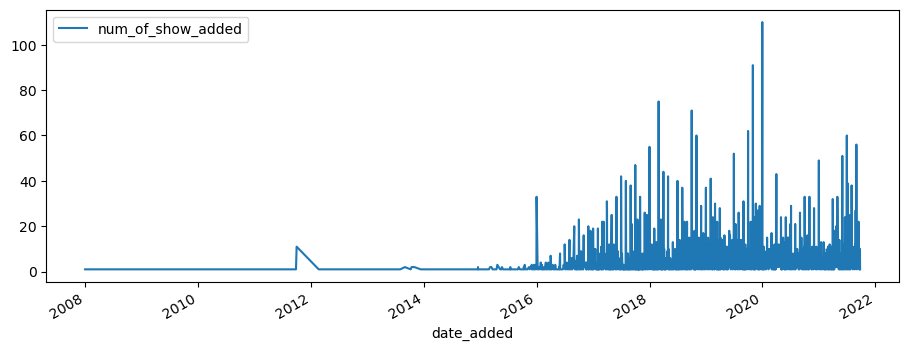

In [27]:
num_shows.plot()

>>number of shows increased Beginning in 2016, when the smart mobile began to spread greatly allover world && number of shows was in peak in 2020 (the year of covid 19 Where people sit in their homes to isolate).

______

## Task 2: Extract the day name and sum-up the shows added 
<a id='task3'></a>

In the last step, we have used the `date_added` column to count the number of shows.    
Since we've used the `groupby` functionality to count the number of shows,     
the column is set as our index. 

We could now use our new index directly to extract the Attributes of the timestamp.    
One example of those Attributes is the `day_name`.    
Check out the [full list of the attributes here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html).

In [42]:
#we will use (.index) becoues date_added becomes the index of num_shows table ......if it wasn't we would 
#                                                                           make date_added is the index.
num_shows['day_of_week']=num_shows.index.day_name()
num_shows

,show_id,day_of_week
date_added,,
2008-01-01,1,Tuesday
2008-02-04,1,Monday
2009-05-05,1,Tuesday
2009-11-18,1,Wednesday
2010-11-01,1,Monday
...,...,...
2021-09-21,5,Tuesday
2021-09-22,9,Wednesday
2021-09-23,2,Thursday


In [44]:
sum_shows=num_shows.groupby('day_of_week')[['show_id']].sum()
sum_shows

,show_id
day_of_week,
Friday,2498
Monday,851
Saturday,816
Sunday,751
Thursday,1396
Tuesday,1197
Wednesday,1288


>>Seems that Netflix prefers to release the new shows on Fridays 

______

## Task 3: Select data from 2016 onwards 

You can also use the regular masking way to select and filter entries.      
The syntax is even simpler than one could expect. You don't even need to parse    
your filtering criteria to `datetime`. A simple string with `%YYYY-%MM-%DD` format     
will do the job  


In [69]:
after_2016=num_shows.index >= '2016-01-01'
num_shows=num_shows[after_2016].copy()
num_shows

,show_id,day_of_week
date_added,,
2016-01-01,33,Friday
2016-01-08,1,Friday
2016-01-13,1,Wednesday
2016-01-15,2,Friday
2016-01-22,1,Friday
...,...,...
2021-09-21,5,Tuesday
2021-09-22,9,Wednesday
2021-09-23,2,Thursday


In [70]:
num_shows.index.min()
# year will start from 2016

Timestamp('2016-01-01 00:00:00')

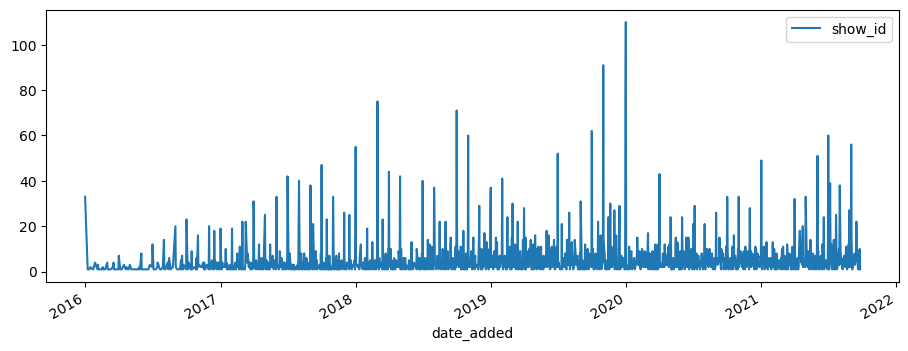

In [72]:
num_shows[after_2016].plot()

______

## Task 4: Sum up weekly data 

It is possible to change the granularity of your timeseries directly using Pandas datetie module.        
       
       
To do that, you need to specify two things: 
- Your new granularity passed as an argument to the `resample` function. [Read more details](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)
- The function that will be used to generate the new granularity

In [80]:
# Use the resampling function to group data per week
weekly_count=num_shows[['show_id']].resample('1W').sum()
weekly_count

,show_id
date_added,
2016-01-03,33
2016-01-10,1
2016-01-17,3
2016-01-24,2
2016-01-31,4
...,...
2021-08-29,55
2021-09-05,81
2021-09-12,28


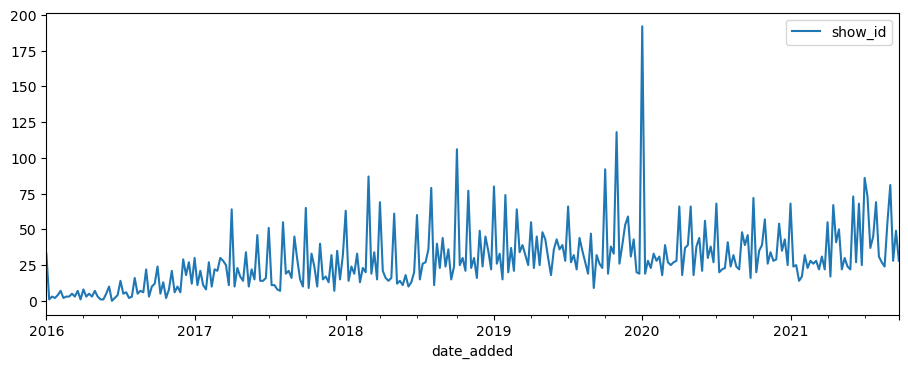

In [81]:
weekly_count.plot()

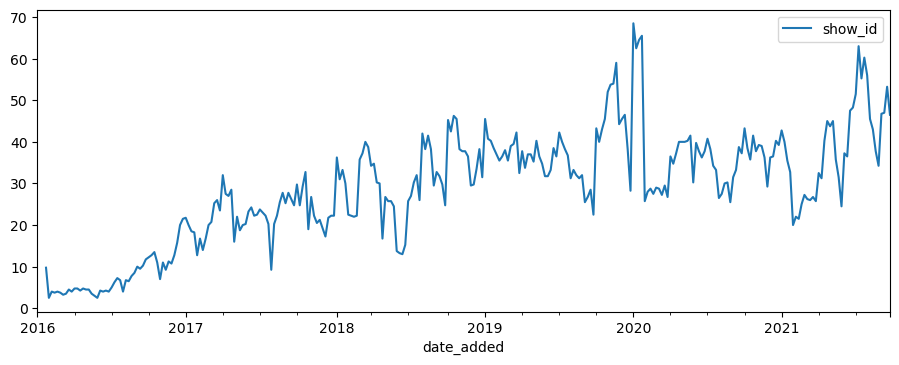

In [93]:
weekly_count.rolling(4).mean().plot()